In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [6]:
# Load data from JSON
with open("scraping_output/wathec.json", 'r') as file:
    watches = json.load(file)
    
# Clean the keys by removing colons
cleaned_watches = []
for watch in watches:
    cleaned_watch = {key.rstrip(':'): value for key, value in watch.items()}
    cleaned_watches.append(cleaned_watch)

# Convert cleaned data to a DataFrame
df = pd.DataFrame(cleaned_watches)

# Clean 'mm' and convert to numeric
measurement_fields = ['Diameter', 'Height', 'Lug Width']
for field in measurement_fields:
    df[field] = df[field].str.replace(' mm', '').astype(float)

# save as json
df.to_json('scraping_output/cleaned_watches.json')


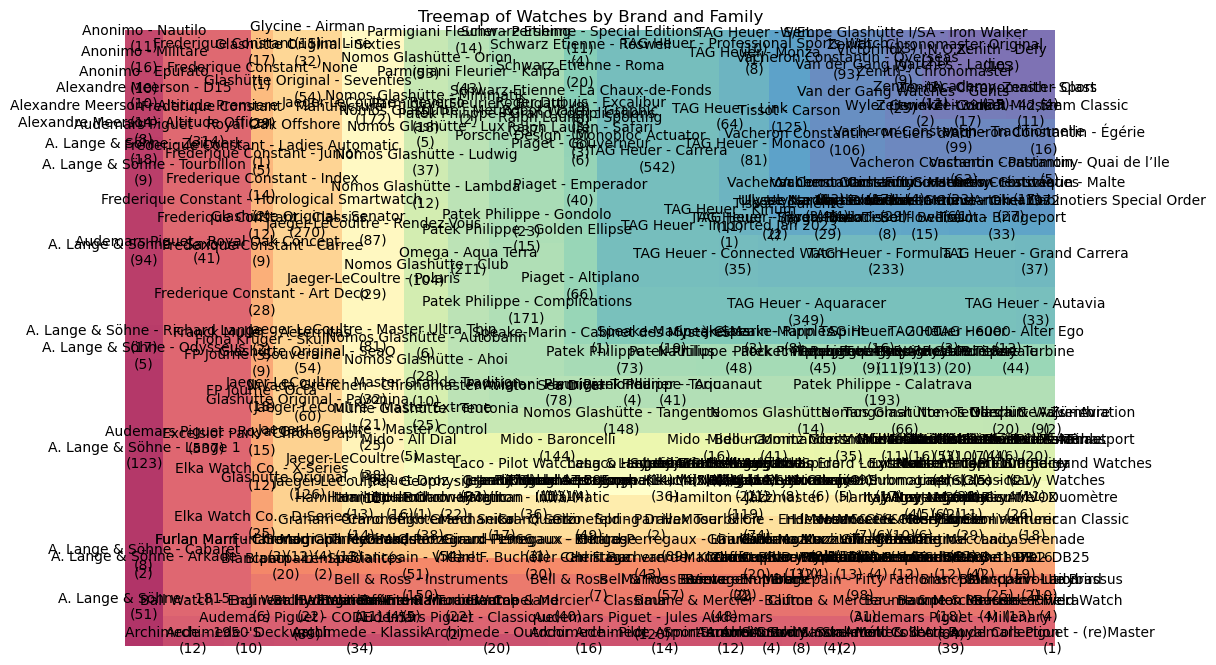

In [11]:
df = pd.read_json('scraping_output/cleaned_watches.json')
grouped_data = df.groupby(['Brand', 'Family']).size().reset_index(name='Count')

# Prepare labels for the Treemap
grouped_data['Label'] = grouped_data['Brand'] + ' - ' + grouped_data['Family'] + '\n(' + grouped_data['Count'].astype(str) + ')'

# Colors (optional, can be customized)
colors = [plt.cm.Spectral(i/float(len(grouped_data))) for i in range(len(grouped_data))]

# Plot Treemap
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, aspect="auto")
squarify.plot(sizes=grouped_data['Count'], label=grouped_data['Label'], color=colors, alpha=.8, ax=ax)
plt.title('Treemap of Watches by Brand and Family')
plt.axis('off')
plt.show()

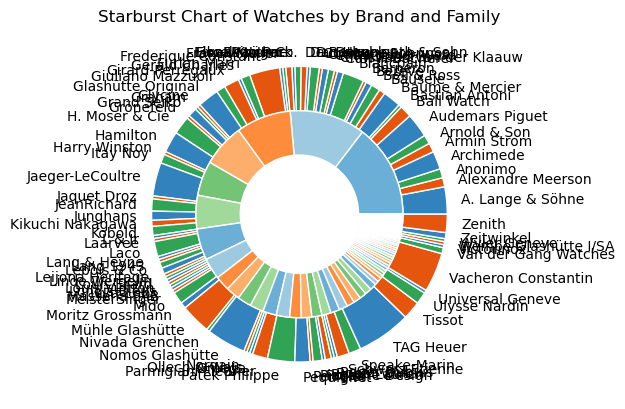

In [12]:
# Analysis
watches_per_family = df.groupby(['Brand', 'Family']).size().reset_index(name='Count')
families_per_brand = df.groupby('Brand')['Family'].nunique().reset_index(name='Number of Families')

# Plotting a starburst chart
fig, ax = plt.subplots()
size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# Outer ring: Brands and number of families
ax.pie(families_per_brand['Number of Families'], radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), labels=families_per_brand['Brand'])

# Inner ring: Families and number of watches
inner_ring_data = pd.concat([pd.Series(row['Brand'], row['Count']*[row['Family']]) for _, row in watches_per_family.iterrows()]).reset_index(drop=True)
ax.pie(inner_ring_data.value_counts(), radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))
print(families_per_brand)

ax.set(aspect="equal", title='Starburst Chart of Watches by Brand and Family')
plt.show()

In [13]:
# Iterate over each row in the DataFrame to print brand and family
for index, row in watches_per_family.iterrows():
    print(f"{row['Brand']}, {row['Family']}")


A. Lange & Söhne, 1815
A. Lange & Söhne, Arkade
A. Lange & Söhne, Cabaret
A. Lange & Söhne, Lange 1
A. Lange & Söhne, Odysseus
A. Lange & Söhne, Richard Lange
A. Lange & Söhne, Saxonia
A. Lange & Söhne, Tourbillon
A. Lange & Söhne, Zeitwerk
Alexandre Meerson, Altitude Officer
Alexandre Meerson, Altitude Premiere
Alexandre Meerson, D15
Anonimo, Epurato
Anonimo, Militare
Anonimo, Nautilo
Archimede, 1950'S
Archimede, Deckwatch
Archimede, Klassik
Archimede, Outdoor
Archimede, Pilot
Archimede, Sporttaucher
Armin Strom, Gravity
Armin Strom, Manual
Armin Strom, Skeleton
Arnold & Son, Instrument Collection
Arnold & Son, Métiers d'Art
Arnold & Son, Royal Collection
Audemars Piguet, (re)Master
Audemars Piguet, CODE 11.59
Audemars Piguet, Classique
Audemars Piguet, Jules Audemars
Audemars Piguet, Millenary
Audemars Piguet, Royal Oak
Audemars Piguet, Royal Oak Concept
Audemars Piguet, Royal Oak Offshore
Ball Watch, Engineer Hydrocarbon
Ball Watch, Engineer II
Ball Watch, Fireman
Ball Watch, Offici

C:\Users\bozov\AppData\Local\Temp\ipykernel_13360\2453232049.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(outer_pie, labels=entries_per_brand['Brand:'], title="Brands", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


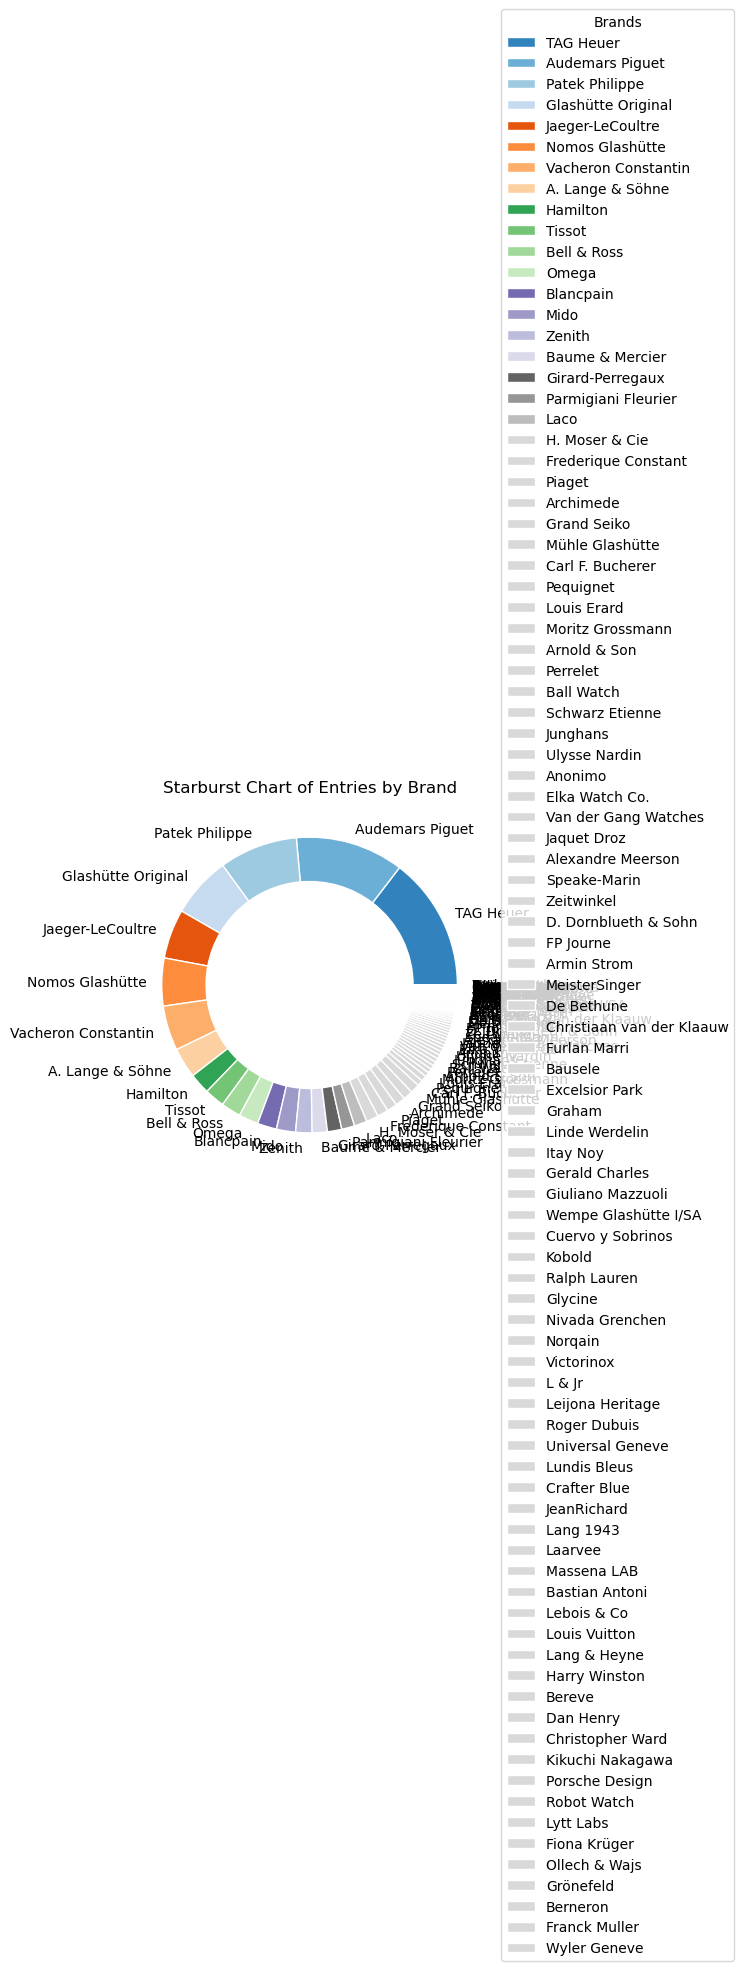

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame containing watch data

# Your analysis code
entries_per_brand = df['Brand:'].value_counts().reset_index()
entries_per_brand.columns = ['Brand:', 'Count']

# Plotting a starburst chart
fig, ax = plt.subplots()
size = 0.3

# Outer ring: Brands and number of entries
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(entries_per_brand)))

outer_pie, _ = ax.pie(entries_per_brand['Count'], radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), labels=entries_per_brand['Brand:'])

ax.set(aspect="equal", title='Starburst Chart of Entries by Brand')

plt.legend(outer_pie, labels=entries_per_brand['Brand:'], title="Brands", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


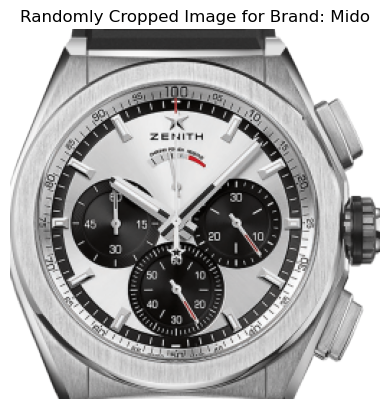

In [72]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Loading the image using PIL
image = Image.open("scraping_output\images\Zenith\defy\Zenith_-_95.9001.9004_01.R782_Defy_El_Primero_21_Titanium___Silver_Panda___Rubber_Case.jpg")

# Resizing the image to fit within a 500x500 frame while maintaining aspect ratio
image.thumbnail((600, 600))

# Randomly cropping the image to 257x257
left = random.randint(0, image.size[0] - 257)
top = random.randint(0, image.size[1] - 257)
right = left + 257
bottom = top + 257
cropped_image = image.crop((left, top, right, bottom))

# Displaying the image
plt.imshow(cropped_image)
plt.title(f"Randomly Cropped Image for Brand: {random_brand}")
plt.axis('off')  # Hide axis
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


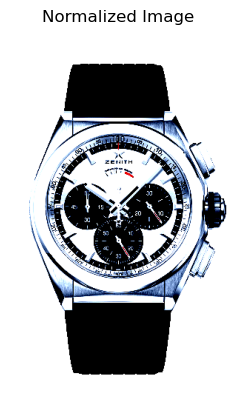

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL
image = Image.open("scraping_output/images/Zenith/defy/Zenith_-_95.9001.9004_01.R782_Defy_El_Primero_21_Titanium___Silver_Panda___Rubber_Case.jpg")

# Convert the image to RGB format (discard alpha channel if present)
image = image.convert("RGB")

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
normalized_image_array = (image_array / 255.0 - mean) / std

# Display the normalized image
plt.imshow(normalized_image_array)
plt.title("Normalized Image")
plt.axis('off')
plt.show()
